# Подготовка дашборда Tableau для анализа взаимодействия пользователей с карточками Яндекс.Дзен.

## [Ссылка на дашборд Tableau](https://public.tableau.com/profile/rinankova#!/vizhome/ZenVisitsDash/dash_visits?publish=yes)

## [Ссылка на презентацию](https://drive.google.com/file/d/1V_CcQDtwSztNmM9HSzjBWbdc4dwwLENe/view?usp=sharing)

# Содержание:
- <a href='#loading'>Выгрузка данных<a>
- <a href='#control'>Проверка данных<a>
- <a href='#reports'>Расчет данных для отчетов<a>
    - <a href='#report1'>История событий по темам карточек<a>
    - <a href='#report2'>Разбивка событий по темам источников<a>
    - <a href='#report3'>Таблица соответствия тем источников темам карточек<a>

- # Выгрузка данных о взаимодействии с карточками статей из базы
<a id='loading'>

- #### Импортируем необходимые библиотеки

In [1]:
import pandas as pd
from sqlalchemy import create_engine
from matplotlib import pyplot as plt
import seaborn as sns

- #### Подключимся к базе данных

In [2]:
# импортируем библиотеки


db_config = {'user': 'praktikum_student',         # имя пользователя
             'pwd': 'Sdf4$2;d-d30pp', # пароль
             'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
             'port': 6432,              # порт подключения
             'db': 'data-analyst-zen-project-db'}          # название базы данных

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'], 
                                                         db_config['pwd'], 
                                                         db_config['host'], 
                                                         db_config['port'],
                                                         db_config['db'])
engine = create_engine(connection_string)

- #### Получим данных из таблицы базы данных

In [3]:
query = 'SELECT * FROM dash_visits'

In [4]:
dash_visits = pd.io.sql.read_sql(query, con = engine)

In [5]:
dash_visits.head(20)

,record_id,item_topic,source_topic,age_segment,dt,visits
0,1040597,Деньги,Авто,18-25,2019-09-24 18:32:00,3
1,1040598,Деньги,Авто,18-25,2019-09-24 18:35:00,1
2,1040599,Деньги,Авто,18-25,2019-09-24 18:54:00,4
3,1040600,Деньги,Авто,18-25,2019-09-24 18:55:00,17
4,1040601,Деньги,Авто,18-25,2019-09-24 18:56:00,27
5,1040602,Деньги,Авто,18-25,2019-09-24 18:57:00,22
6,1040603,Деньги,Авто,18-25,2019-09-24 18:58:00,24
7,1040604,Деньги,Авто,18-25,2019-09-24 18:59:00,20
8,1040605,Деньги,Авто,18-25,2019-09-24 19:00:00,5
9,1040606,Деньги,Авто,26-30,2019-09-24 18:29:00,1


- #### Сохраним данных в csv-файл

In [6]:
dash_visits.to_csv('./datasets/dash_visits.csv', index=False)

# Проверка выгруженных данных
<a id='control'>

- #### Преобразуем даные к нужным типам

In [7]:
columns_numeric = ['record_id', 'visits']
for column in columns_numeric: dash_visits[column] = pd.to_numeric(dash_visits[column], errors='coerce')
    
columns_datetime = ['dt']
for column in columns_datetime: dash_visits[column] = pd.to_datetime(dash_visits[column], errors='coerce')

In [8]:
dash_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30745 entries, 0 to 30744
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   record_id     30745 non-null  int64         
 1   item_topic    30745 non-null  object        
 2   source_topic  30745 non-null  object        
 3   age_segment   30745 non-null  object        
 4   dt            30745 non-null  datetime64[ns]
 5   visits        30745 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 1.4+ MB


- #### Проверим загруженные даныне на наличие пропущенных значений, дубликатов.

In [9]:
f'Пропущенных значений {dash_visits.isna().sum().sum()}, дубликатов {dash_visits.duplicated().sum()}'

'Пропущенных значений 0, дубликатов 0'

- #### Посмотрим на то, какие данные используются для фильтров.

- Категории карточек

In [10]:
dash_visits['item_topic'].value_counts().sort_index()

Деньги                1234
Дети                  1229
Женская психология     914
Женщины               1230
Здоровье              1203
Знаменитости           976
Интересные факты      1535
Искусство             1119
История               1363
Красота               1193
Культура              1160
Наука                 1505
Общество              1422
Отношения             1536
Подборки              1456
Полезные советы       1424
Психология            1056
Путешествия           1247
Рассказы              1109
Россия                1385
Семья                 1287
Скандалы              1023
Туризм                1206
Шоу                    804
Юмор                  1129
Name: item_topic, dtype: int64

- Категории источников

In [11]:
dash_visits['source_topic'].value_counts().sort_index()

Авто                  1077
Деньги                 973
Дети                  1459
Еда                    912
Здоровье              1243
Знаменитости          1650
Интерьеры              809
Искусство             1228
История               1437
Кино                  1505
Музыка                 750
Одежда                1379
Полезные советы       1578
Политика              1024
Психология            1055
Путешествия           1563
Ремонт                 985
Россия                1687
Сад и дача            1036
Сделай сам             995
Семейные отношения    1822
Семья                 1405
Спорт                 1007
Строительство          758
Технологии             741
Финансы                667
Name: source_topic, dtype: int64

In [12]:
dash_visits.loc[dash_visits['item_topic']=='Красота']['source_topic'].value_counts()

Знаменитости          76
Полезные советы       68
Семейные отношения    65
Здоровье              65
Дети                  64
Путешествия           63
Сад и дача            57
Сделай сам            57
Одежда                55
Россия                53
Кино                  49
Семья                 48
Искусство             48
Ремонт                47
История               45
Еда                   44
Политика              44
Строительство         40
Интерьеры             39
Психология            39
Музыка                24
Технологии            24
Деньги                22
Спорт                 21
Финансы               20
Авто                  16
Name: source_topic, dtype: int64

In [13]:
dash_visits.groupby(by='item_topic').agg({'source_topic': 'unique'})

,source_topic
item_topic,
Деньги,"[Авто, Деньги, Дети, Еда, Здоровье, Знаменитос..."
Дети,"[Авто, Деньги, Дети, Еда, Здоровье, Знаменитос..."
Женская психология,"[Авто, Деньги, Дети, Еда, Здоровье, Знаменитос..."
Женщины,"[Авто, Деньги, Дети, Еда, Здоровье, Знаменитос..."
Здоровье,"[Авто, Деньги, Дети, Еда, Здоровье, Знаменитос..."
Знаменитости,"[Авто, Деньги, Дети, Еда, Здоровье, Знаменитос..."
Интересные факты,"[Авто, Деньги, Дети, Еда, Здоровье, Знаменитос..."
Искусство,"[Авто, Деньги, Дети, Еда, Здоровье, Знаменитос..."
История,"[Авто, Деньги, Дети, Еда, Здоровье, Знаменитос..."


In [14]:
dash_visits['age_segment'].value_counts()

18-25    7056
26-30    5875
31-35    5552
36-40    5105
41-45    3903
45+      3254
Name: age_segment, dtype: int64

In [15]:
f"Период с {dash_visits['dt'].min()} по {dash_visits['dt'].max()}"

'Период с 2019-09-24 18:28:00 по 2019-09-24 19:00:00'

In [16]:
# выделим столбец с минутами
dash_visits['min'] = dash_visits['dt'].dt.minute.astype('int')
dash_visits.sort_values(by='min').head()

,record_id,item_topic,source_topic,age_segment,dt,visits,min
30744,1071341,Юмор,Финансы,41-45,2019-09-24 19:00:00,1,0
19113,1059710,Полезные советы,Авто,31-35,2019-09-24 19:00:00,11,0
3868,1044465,Женщины,История,36-40,2019-09-24 19:00:00,1,0
19100,1059697,Полезные советы,Авто,26-30,2019-09-24 19:00:00,9,0
19088,1059685,Полезные советы,Авто,18-25,2019-09-24 19:00:00,20,0


# Данные для проверки дашборда
<a id='reports'>

## Разбивка по темам карточек
<a id='report1'>

In [17]:
#dash_visits_sample = dash_visits.copy()
#dash_visits_sample = dash_visits.query('age_segment in ["18-25"]')
dash_visits_sample = dash_visits.loc[(dash_visits['min'].isin([28]))]
dash_visits_sample.head()

,record_id,item_topic,source_topic,age_segment,dt,visits,min
77,1040674,Деньги,Деньги,36-40,2019-09-24 18:28:00,1,28
93,1040690,Деньги,Дети,18-25,2019-09-24 18:28:00,1,28
117,1040714,Деньги,Дети,31-35,2019-09-24 18:28:00,1,28
131,1040728,Деньги,Дети,36-40,2019-09-24 18:28:00,1,28
142,1040739,Деньги,Дети,41-45,2019-09-24 18:28:00,1,28


In [18]:
# разбивка семпла по темам карточек в разрезе времени
dash_visits_pivot = dash_visits_sample.pivot_table(index='min', 
                                            columns='item_topic', 
                                            values='visits', 
                                            aggfunc='sum')
dash_visits_pivot

item_topic,Деньги,Дети,Женская психология,Женщины,Здоровье,Знаменитости,Интересные факты,Искусство,История,Красота,...,Полезные советы,Психология,Путешествия,Рассказы,Россия,Семья,Скандалы,Туризм,Шоу,Юмор
min,,,,,,,,,,,,,,,,,,,,,
28,24,32,19,27,25,14,56,17,43,22,...,37,18,35,43,40,32,34,20,18,23


In [19]:
# разбивка семпла по темам карточек в разрезе времени (%)
dash_visits_pivot.div(other=dash_visits_pivot.sum(axis=1), axis=0).T

min,28
item_topic,
Деньги,0.028743
Дети,0.038323
Женская психология,0.022754
Женщины,0.032335
Здоровье,0.029940
Знаменитости,0.016766
Интересные факты,0.067066
Искусство,0.020359
История,0.051497


In [20]:
total_visits = dash_visits_pivot.sum(axis=1)
total_visits

min
28    835
dtype: int64

## Разбивка по темам источников
<a id='report2'>

In [21]:
#visits_by_source = dash_visits.copy()
visits_by_source = dash_visits.loc[(dash_visits['source_topic'].isin(['Деньги']))]
visits_by_source.head()

,record_id,item_topic,source_topic,age_segment,dt,visits,min
52,1040649,Деньги,Деньги,18-25,2019-09-24 18:32:00,2,32
53,1040650,Деньги,Деньги,18-25,2019-09-24 18:33:00,1,33
54,1040651,Деньги,Деньги,18-25,2019-09-24 18:53:00,1,53
55,1040652,Деньги,Деньги,18-25,2019-09-24 18:54:00,3,54
56,1040653,Деньги,Деньги,18-25,2019-09-24 18:55:00,14,55


#### Количество визитов по источникам по минутам.

In [22]:
visits_by_source_pivot = visits_by_source.pivot_table(index='min', 
                                                      columns='item_topic', 
                                                      values='visits', 
                                                      aggfunc='sum')
visits_by_source_pivot.T.sum(axis=1)

item_topic
Деньги                203.0
Дети                  228.0
Женская психология    256.0
Женщины               122.0
Здоровье               95.0
Знаменитости           55.0
Интересные факты      145.0
Искусство              98.0
История               114.0
Красота                48.0
Культура               46.0
Наука                 197.0
Общество              350.0
Отношения             281.0
Подборки              217.0
Полезные советы       916.0
Психология             86.0
Путешествия           363.0
Рассказы              454.0
Россия                229.0
Семья                 458.0
Скандалы               35.0
Туризм                 74.0
Шоу                     8.0
Юмор                   79.0
dtype: float64

#### Количество визитов по каждой теме источника

In [23]:
visits_by_source_pivot.T.sum(axis=1).sort_values().sum()

5157.0

#### % визитов по каждой теме источника

In [24]:
visits_by_source_pivot.sum(axis=0).div(visits_by_source_pivot.sum(axis=0).sum())

item_topic
Деньги                0.039364
Дети                  0.044212
Женская психология    0.049641
Женщины               0.023657
Здоровье              0.018422
Знаменитости          0.010665
Интересные факты      0.028117
Искусство             0.019003
История               0.022106
Красота               0.009308
Культура              0.008920
Наука                 0.038201
Общество              0.067869
Отношения             0.054489
Подборки              0.042079
Полезные советы       0.177623
Психология            0.016676
Путешествия           0.070390
Рассказы              0.088036
Россия                0.044406
Семья                 0.088811
Скандалы              0.006787
Туризм                0.014349
Шоу                   0.001551
Юмор                  0.015319
dtype: float64

## Тема источника - тема карточки
<a id='report3'>

In [25]:
source_item_pivot = dash_visits.pivot_table(index='source_topic', columns='item_topic', values='visits', aggfunc='sum')
source_item_pivot

item_topic,Деньги,Дети,Женская психология,Женщины,Здоровье,Знаменитости,Интересные факты,Искусство,История,Красота,...,Полезные советы,Психология,Путешествия,Рассказы,Россия,Семья,Скандалы,Туризм,Шоу,Юмор
source_topic,,,,,,,,,,,,,,,,,,,,,
Авто,338.0,192.0,26.0,156.0,232.0,29.0,1254.0,145.0,522.0,29.0,...,749.0,19.0,343.0,78.0,1885.0,50.0,14.0,161.0,4.0,224.0
Деньги,203.0,228.0,256.0,122.0,95.0,55.0,145.0,98.0,114.0,48.0,...,916.0,86.0,363.0,454.0,229.0,458.0,35.0,74.0,8.0,79.0
Дети,859.0,621.0,613.0,875.0,798.0,145.0,327.0,639.0,1047.0,703.0,...,707.0,1233.0,509.0,286.0,493.0,361.0,844.0,406.0,297.0,404.0
Еда,193.0,675.0,67.0,348.0,558.0,36.0,391.0,7.0,60.0,253.0,...,223.0,62.0,357.0,28.0,23.0,1236.0,48.0,382.0,1.0,194.0
Здоровье,65.0,346.0,349.0,1022.0,404.0,139.0,2090.0,70.0,771.0,736.0,...,1346.0,583.0,187.0,248.0,282.0,275.0,43.0,311.0,20.0,124.0
Знаменитости,591.0,1444.0,546.0,967.0,962.0,445.0,720.0,1083.0,921.0,1313.0,...,271.0,582.0,509.0,615.0,1579.0,689.0,1992.0,269.0,829.0,334.0
Интерьеры,62.0,97.0,NaN,175.0,57.0,12.0,54.0,164.0,30.0,185.0,...,427.0,46.0,26.0,47.0,134.0,321.0,93.0,279.0,30.0,17.0
Искусство,172.0,238.0,96.0,485.0,64.0,356.0,697.0,512.0,695.0,232.0,...,83.0,306.0,555.0,291.0,355.0,288.0,91.0,173.0,66.0,205.0
История,271.0,455.0,181.0,560.0,68.0,644.0,1273.0,596.0,636.0,177.0,...,437.0,286.0,1018.0,568.0,1104.0,266.0,410.0,618.0,215.0,715.0


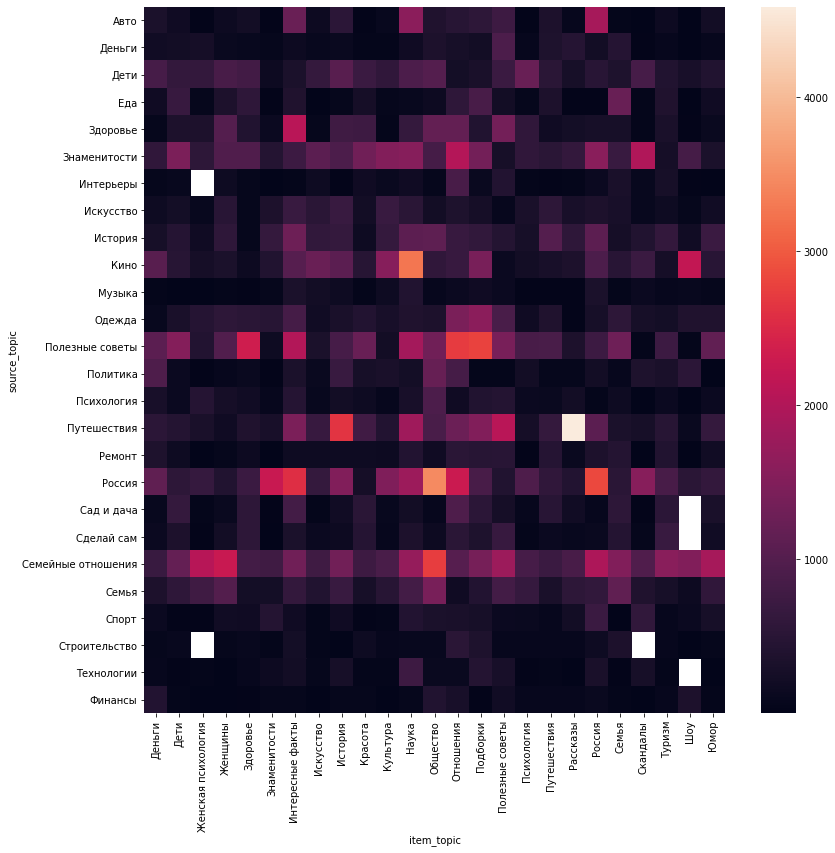

In [26]:
plt.figure(figsize=(13, 13))
ax = sns.heatmap(source_item_pivot)